In [38]:
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import default_collate
import pandas as pd
import seaborn as sns
import torch

In [32]:
data = {
    'unet': np.load('../../results-tmp/results/unet/heart_unet_results.npy', allow_pickle=True).item(),
    'ensemble': np.load('../../results-tmp/results/unet/heart_ensemble_results.npy', allow_pickle=True).item(),
    #'first_resDAE': np.load('../../results-tmp/heart_downstream_results_resDAE.npy', allow_pickle=True).item(),
    'current_recon': np.load('../../results-tmp/heart_downstream_results_localAug_multiImgSingleView_recon_balanced_same.npy', allow_pickle=True).item()
}

In [33]:
df = pd.DataFrame(columns=['acdc_train', 'acdc_val', 'mnm_siemens', 'mnm_philips', 'mnm_ge', 'mnm_canon', 'method'])
for key in data:
    df_tmp = pd.DataFrame.from_dict(data[key])
    df_tmp['method'] = key
    
    df = pd.concat([df, df_tmp], ignore_index=True)
    
df = pd.melt(df, id_vars=['method'])
df = df.rename(columns={'variable': 'scanner', 'value': 'DSC'})

<AxesSubplot:xlabel='scanner', ylabel='DSC'>

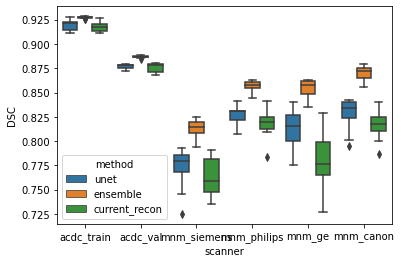

In [34]:
sns.boxplot(data=df, x='scanner', y='DSC', hue='method')

In [25]:
df.head()

,method,scanner,DSC
0,unet,acdc_train,0.923220
1,unet,acdc_train,0.923348
2,unet,acdc_train,0.911828
3,unet,acdc_train,0.911891
4,unet,acdc_train,0.928072


In [23]:
pd.melt(df, id_vars=['method']) #, value_vars=[])

,method,variable,value
0,unet,acdc_train,0.923220
1,unet,acdc_train,0.923348
2,unet,acdc_train,0.911828
3,unet,acdc_train,0.911891
4,unet,acdc_train,0.928072
...,...,...,...
175,first_resDAE,mnm_canon,0.831312
176,first_resDAE,mnm_canon,0.828041
177,first_resDAE,mnm_canon,0.828038
178,first_resDAE,mnm_canon,0.789320


In [3]:
# Unet dice scores for ACDC / M&M
heart_unet_dice = np.load('../../results-tmp/results/unet/heart_unet_results.npy', allow_pickle=True).item()
for key in heart_unet_dice:
    print(key, np.array(heart_unet_dice[key]).mean())

acdc_train 0.9196690758540539
acdc_val 0.8766713584462801
mnm_siemens 0.7721905665753751
mnm_philips 0.826983251601435
mnm_ge 0.8119101529320082
mnm_canon 0.8280752354427843


In [4]:
# Unet dice scores for ACDC / M&M
heart_ensemble_dice = np.load('../../results-tmp/results/unet/heart_ensemble_results.npy', allow_pickle=True).item()
for key in heart_ensemble_dice:
    print(key, np.array(heart_ensemble_dice[key]).mean())

acdc_train 0.9273989976865972
acdc_val 0.886894628405571
mnm_siemens 0.8129487136782627
mnm_philips 0.8567954603331636
mnm_ge 0.8538719902435938
mnm_canon 0.8698676469574215


In [5]:
# Unet dice scores for ACDC / M&M
heart_ensemble_dice = np.load('../../results-tmp/heart_downstream_results_resDAE.npy', allow_pickle=True).item()
for key in heart_ensemble_dice:
    print(key, np.array(heart_ensemble_dice[key]).mean())

acdc_train 0.9154994132569028
acdc_val 0.8739899406830469
mnm_siemens 0.7620652370222715
mnm_philips 0.8199462015370724
mnm_ge 0.7996387978394826
mnm_canon 0.8210951471366339


In [11]:
df = pd.DataFrame.from_dict(heart_ensemble_dice)
df['method'] = 'ensemble'
df

,acdc_train,acdc_val,mnm_siemens,mnm_philips,mnm_ge,mnm_canon,method
0,0.923465,0.879958,0.777975,0.839748,0.833471,0.836850,ensemble
1,0.922247,0.878853,0.783111,0.832010,0.815640,0.822399,ensemble
2,0.904489,0.869412,0.781224,0.825194,0.828851,0.834566,ensemble
3,0.911608,0.878161,0.709500,0.803753,0.753922,0.784083,ensemble
4,0.914412,0.871550,0.765641,0.817531,0.791553,0.821852,ensemble
5,0.916769,0.871589,0.764724,0.818168,0.798039,0.831312,ensemble
6,0.911918,0.878220,0.766242,0.818779,0.797227,0.828041,ensemble
7,0.913651,0.870906,0.758845,0.822776,0.799545,0.828038,ensemble
8,0.917139,0.870265,0.730553,0.792201,0.749540,0.789320,ensemble
9,0.919296,0.870985,0.782836,0.829301,0.828600,0.834489,ensemble


In [24]:
print("set, unet, ensemble")
for key in heart_ensemble_dice:
    print(f"{key}, {np.array(heart_unet_dice[key]).mean():.4f}, {np.array(heart_ensemble_dice[key]).mean():.4f}")

set, unet, ensemble
acdc_train, 0.9197, 0.9274
acdc_val, 0.8767, 0.8869
mnm_siemens, 0.7722, 0.8129
mnm_philips, 0.8270, 0.8568
mnm_ge, 0.8119, 0.8539
mnm_canon, 0.8281, 0.8699


In [52]:
# print("| ACDC / M&M | | |")
print("| set | unet | ensemble |")
print("|---|---|---|")
for key in heart_ensemble_dice:
    print(f"| {key} | {np.array(heart_unet_dice[key]).mean():.4f} | {np.array(heart_ensemble_dice[key]).mean():.4f} |")

| set | unet | ensemble |
|---|---|---|
| acdc_train | 0.9197 | 0.9274 |
| acdc_val | 0.8767 | 0.8869 |
| mnm_siemens | 0.7722 | 0.8129 |
| mnm_philips | 0.8270 | 0.8568 |
| mnm_ge | 0.8119 | 0.8539 |
| mnm_canon | 0.8281 | 0.8699 |


In [ ]:
set          unet    ensemble
acdc_train,  0.9197, 0.9274
acdc_val,    0.8767, 0.8869
mnm_siemens, 0.7722, 0.8129
mnm_philips, 0.8270, 0.8568
mnm_ge,      0.8119, 0.8539
mnm_canon,   0.8281, 0.8699


In [37]:
# Unet dice scores for ACDC / M&M
brain_unet_dice = np.load('../../results-tmp/results/unet/brain_unet_results.npy', allow_pickle=True).item()
for key in brain_unet_dice:
    print(key, default_collate(brain_unet_dice[key])['Volumetric Dice'].mean().item())
    #print(key, np.array(brain_unet_dice[key]['Volumetric Dice']).mean())

cc_train 0.9910455544789631
cc_val 0.9853569885094959
cc_site1 0.9586749931176504
cc_site2 0.9295904410382112
cc_site3 0.8969023927002195
cc_site4 0.8164349953333536
cc_site5 0.9008615513642629


In [41]:
# Unet dice scores for ACDC / M&M
brain_ensemble_dice = np.load('../../results-tmp/results/unet/brain_ensemble_results.npy', allow_pickle=True).item()
for key in brain_ensemble_dice:
    print(key, np.array(brain_ensemble_dice[key]).mean())
    #print(key, default_collate(brain_ensemble_dice[key])['Volumetric Dice'].mean().item())
    #print(key, np.array(brain_unet_dice[key]['Volumetric Dice']).mean())

cc_train 0.9912673324346543
cc_val 0.987064598997434
cc_site1 0.9600168355305989
cc_site2 0.9205873404057087
cc_site3 0.9065432909195508
cc_site4 0.9078365654746692
cc_site5 0.918809078236421


In [51]:
#print("|Calgar| | |")
print("| set | unet | ensemble |")
print("|---|---|---|")
for key in brain_ensemble_dice:
    print(f"|{key} | {default_collate(brain_unet_dice[key])['Volumetric Dice'].mean().item():.4f} | {np.array(brain_ensemble_dice[key]).mean():.4f} |")

| set | unet | ensemble |
|---|---|---|
|cc_train | 0.9910 | 0.9913 |
|cc_val | 0.9854 | 0.9871 |
|cc_site1 | 0.9587 | 0.9600 |
|cc_site2 | 0.9296 | 0.9206 |
|cc_site3 | 0.8969 | 0.9065 |
|cc_site4 | 0.8164 | 0.9078 |
|cc_site5 | 0.9009 | 0.9188 |


In [3]:
import torch
direc = f'../../results-tmp/results/eval/mms/image/mms-res_dae-both-A-0_auroc'
tmp = torch.load(direc)

In [5]:
tmp['ood']

tensor(0.7951)

In [7]:
tmp['corr'].compute()

tensor(0.4230)

In [4]:
import torch
import matplotlib.pyplot as plt

direc = f'../../results-tmp/results/eval/mms/image/mms-res_dae-both-A-0-halflr_auroc'
tmp = torch.load(direc)

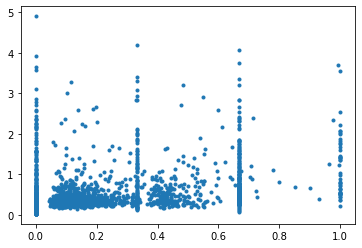

In [6]:
plt.plot(tmp['corr'].target, tmp['corr'].preds, '.')

In [3]:
tmp['corr'].compute()

tensor(0.3732)

In [13]:
direc = f'../../results-tmp/results/eval/mms/image/mms-res_dae-both-A-0-mse_auroc'
tmp = torch.load(direc)

print(tmp['ood'], tmp['corr'].compute())

tensor(0.8205) tensor(0.3731)


In [92]:

import sys

sys.path.append('..')
from utils import Metrics

direc = '../../results-tmp/results/eval/mms/pixel/mms-res_dae-C-0-venus'
tmp = torch.load(direc)


In [93]:
tmp.auc_pr

0.40823060274124146

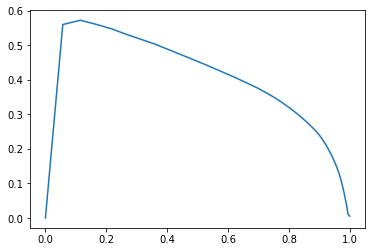

In [94]:
plt.plot(tmp.rec, tmp.pre)

In [95]:

import sys

sys.path.append('..')
from utils import Metrics

direc = '../../results-tmp/results/eval/mms/pixel/mms-testing-C-0-venus'
tmp = torch.load(direc)


In [96]:
tmp.auc_pr

0.2575005888938904

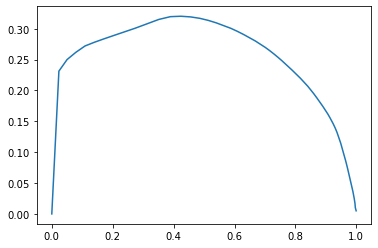

In [97]:
plt.plot(tmp.rec, tmp.pre)

In [84]:

import sys

sys.path.append('..')
from utils import Metrics

direc = '../../results-tmp/results/eval/mms/pixel/mms-res_dae-D-0-venus'
tmp = torch.load(direc)


In [85]:
tmp.auc_pr

0.42565643787384033

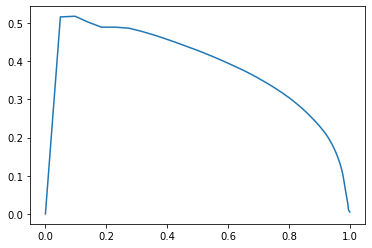

In [77]:
plt.plot(tmp.rec, tmp.pre)

In [47]:
tmp.tpfp

tensor([3.2768e+06, 1.0090e+06, 8.0374e+05, 6.7517e+05, 5.7991e+05, 5.0363e+05,
        4.3970e+05, 3.8450e+05, 3.3582e+05, 2.9220e+05, 2.5263e+05, 2.1639e+05,
        1.8292e+05, 1.5181e+05, 1.2273e+05, 9.5409e+04, 6.9641e+04, 4.5244e+04,
        2.2073e+04, 5.0000e+01])

In [48]:
tmp.tpfn

tensor(29793.)

In [105]:
direc = f'../../results-tmp/results/eval/mms/image/mms-ae-both-C-3'
tmp = torch.load(direc)

In [106]:
tmp

{'ood': tensor(0.2656), 'corr': SpearmanCorrCoef()}

In [103]:
direc = f'../../results-tmp/results/eval/mms/image/mms-testing-both-D-9-venus_auroc'
tmp = torch.load(direc)

In [104]:
tmp

{'ood': tensor(0.5745), 'corr': SpearmanCorrCoef()}

In [119]:
# Change filenames for image data to comply with at least some convention
import os

directory = f'../../results-tmp/results/eval/mms/image/'

# testing to multi_CE
for file in os.listdir(directory):
    if '-testing-both' in file:
        new_name = file.replace('testing', 'multi_CE').replace('-venus_auroc', '')
        print(new_name)
        #os.rename(os.path.join(directory, file), os.path.join(directory, new_name))
        
# res_dae*single to single_CE
for file in os.listdir(directory):
    if '-res_dae' in file and 'venus_single_auroc' in file:
        new_name = file.replace('res_dae', 'single_CE').replace('-venus_single_auroc', '')
        print(file, new_name)
        #os.rename(os.path.join(directory, file), os.path.join(directory, new_name))

In [35]:
directory = f'../../results-tmp/results/eval/mms/image/'

newae = 'mms-localAug_multiImgSingleView_res_balanced_same_acc-corr-A-0'
oldae = 'mms-ae_acc-corr-A-0'
gonzales = 'mms-gonzales_acc-corr-A-0'


In [44]:
data = torch.load(directory + gonzales)

print(data['corr'].compute())

tensor(0.1021)
